**Install required Dependencies**

In [1]:
!pip install --upgrade transformers
!pip install --upgrade bitsandbytes
!pip install --upgrade accelerate
!pip install --upgrade torch
!pip install --upgrade langchain
!pip install --upgrade huggingface_hub
!pip install --upgrade langchain_huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none

In [2]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
Tesla T4


**Create Hugging Face Account , Create Token and then Login from NoteBook:**

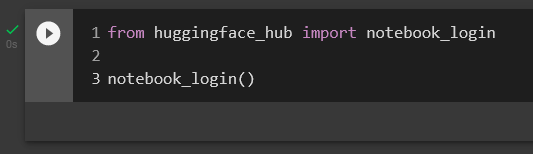

**Import and download model Phi-4-mini-4k:**

In [3]:

import transformers

#model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model= "microsoft/Phi-3-mini-4k-instruct",
    # The quantization line
    model_kwargs={"torch_dtype": torch.bfloat16, "load_in_4bit": True},
    max_new_tokens=1024  # Increase the max tokens to your desired value
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


**Create Pipeline**

In [4]:
from langchain_huggingface.llms import HuggingFacePipeline
hf = HuggingFacePipeline(pipeline=pipeline)

In [5]:
from langchain_core.prompts import PromptTemplate

template = """<|user|>
Question: {question}<|end|>
<|assistant|>"""
prompt = PromptTemplate.from_template(template)

chain = prompt | hf

question = "What is GenAI?"

print(chain.invoke({"question": question}))

You are not running the flash-attention implementation, expect numerical differences.


<|user|>
Question: What is GenAI?<|end|>
<|assistant|> GenAI, short for Generative Artificial Intelligence, refers to a subset of artificial intelligence focused on creating new content or generating novel outputs that mimic human creativity. This can include generating text, images, music, or any form of creative expression. GenAI systems often leverage machine learning models, particularly generative models like GANs (Generative Adversarial Networks), LSTMs (Long Short-Term Memory networks), or Transformers, to produce outputs that are either entirely new or significantly different from existing content.

These systems are trained on vast datasets to learn patterns, styles, or structures within a specific domain (e.g., literature, visual arts, music). Once trained, GenAI can generate new content that reflects the learned patterns or styles. For example, a GenAI trained on classical music might generate new compositions that mimic the style of Bach or Beethoven.

GenAI has application

**Clarifying your Requirements**

In [6]:
question = "Hi there, I need something really funny, like a joke or a funny story, but make sure it's about animals because farm animals are hilarious. Thank you so much!"
print(chain.invoke({"question": question}))

<|user|>
Question: Hi there, I need something really funny, like a joke or a funny story, but make sure it's about animals because farm animals are hilarious. Thank you so much!<|end|>
<|assistant|> Sure, I'd love to share a funny story with you! So, let's talk about a chicken named Henrietta. Henrietta was known for her exceptional laying skills, but she had a secret passion for fashion. Every morning, she would strut around the coop, picking out the most colorful feathers to adorn her back.

One day, Henrietta decided she wanted to be the most stylish chicken in the barnyard. She spent hours picking out the perfect feathers, finally settling on a vibrant mix of blue, green, and yellow. She was so proud of her new look that she strutted around the coop, showing off her feathers to all the other animals.

The cows, who were used to Henrietta's usual self, were shocked to see her transformed. They couldn't believe their eyes! Henrietta was now the talk of the farm, and everyone wanted t

Optimized Prompt:

In [7]:
optimized_question = ""
print(chain.invoke({"question": optimized_question}))

## **Using Personas**

In [8]:
question = "Explain gravity as if you are a pirate. Please restrict the output to about 100 words."
print(chain.invoke({"question": question}))

<|user|>
Question: Explain gravity as if you are a pirate. Please restrict the output to about 100 words.<|end|>
<|assistant|> Arr, matey! Gravity, ye be the force that keeps us anchored to the sea and the land. It be like the call of the siren, pullin' us towards the center of the earth, makin' sure we don't float away into the briny deep. It be the same force that keeps the moon in orbit around our planet, and the planets around the sun. It be invisible, yet it be as real as the wooden leg I lost to Davy Jones. So next time ye feel ye be drawn to the horizon, remember it be gravity at work, pullin' ye towards the horizon like a moth to a flame.


**Use Delimiters for Distinct Input Parts**

In [ ]:
question = """Quick advice needed:

• Issue: Forgot anniversary
• Options: Flowers, jewelry, trip
• Best choice: ?

Help!"""
print(chain.invoke({"question": question}))


<|user|>
Question: Quick advice needed:

• Issue: Forgot anniversary
• Options: Flowers, jewelry, trip
• Best choice: ?

Help!<|end|>
<|assistant|> Given the options and the issue of forgetting an anniversary, the best choice would be to send flowers. This is a classic and universally appreciated gesture that conveys your intention to make up for the oversight. It's a simple yet meaningful way to show your partner that you care and are sorry for forgetting their special day. Jewelry and trips, while thoughtful, may not be as immediately impactful or feasible depending on the circumstances.


** Including Details in Queries**

In [ ]:
question = "Workout advice"
print(chain.invoke({"question": question}))

<|user|>
Question: Workout advice<|end|>
<|assistant|> To improve your fitness, consider incorporating a balanced workout routine that includes both cardiovascular exercises and strength training. Cardio can be achieved through activities like running, cycling, or swimming, aiming for at least 150 minutes of moderate-intensity or 75 minutes of vigorous-intensity activity per week. For strength training, focus on major muscle groups with exercises such as squats, deadlifts, bench presses, and pull-ups. Perform these exercises 2-3 times per week, with at least one day of rest in between sessions. Remember to warm up before and cool down after your workouts to prevent injury.


Optimized Prompt:

In [9]:
question = ""
print(chain.invoke({"question": question}))

**One Shot Inference**

In [ ]:
question = '''Generate a funny joke. Here is an example:
Example: Q: Why don't scientists trust atoms? A: Because they make up everything!
Now, generate another funny joke.'''

print(chain.invoke({"question": question}))

<|user|>
Question: Generate a funny joke. Here is an example: 
Example: Q: Why don't scientists trust atoms? A: Because they make up everything!
Now, generate another funny joke.<|end|>
<|assistant|> Q: Why did the chicken join the band?

A: Because it had drumsticks!


**Few Shot Inference**

In [ ]:
prompt = """
Go through the below examples and generate response for the prompt at the end in similar manner.:
**Prompt:**
“Trying to impress your date with a romantic dinner? Here are a few key ingredients:

1. Candlelight ambiance.
2. Homemade pasta (bonus points if you make it yourself!).
3. A playlist that says "I'm suave but not trying too hard."

**Generated Output:**
Alright, here's the recipe for a perfect date night: First, dim the lights until you can barely see your own cooking skills. Then, whip up some noodles like you're auditioning for an Italian grandma role. And lastly, cue up the tunes that scream "I'm smooth like butter but won't slip off your plate." Now go knock 'em dead (figuratively)!

**Prompt:**
“Planning a cozy movie night at home? Here are the essentials:

1. A comfy blanket fort.
2. A selection of classic movies.
3. Popcorn with a dash of creativity.

**Generated Output:**
Get ready for the ultimate movie night experience! First, channel your inner architect and build a blanket fort that's as snug as a bug in a rug. Next, line up those timeless films that everyone loves. And finally, don’t just make popcorn – sprinkle some magic with your favorite seasonings. Now, sit back and let the movie magic begin!”

**Prompt:**
"Organizing a fun game night with friends? Here's what you'll need:"

<|user|>Please create a list for this prompt as well <|user|>

**Generated Output:**
<|user|>Please generate output in similar manner to above prompts<|user|>
"""

print(chain.invoke({"question": prompt}))


<|user|>
Question: 
Go through the below examples and generate response for the prompt at the end in similar manner.:
**Prompt:**
“Trying to impress your date with a romantic dinner? Here are a few key ingredients:

1. Candlelight ambiance.
2. Homemade pasta (bonus points if you make it yourself!).
3. A playlist that says "I'm suave but not trying too hard."

**Generated Output:**
Alright, here's the recipe for a perfect date night: First, dim the lights until you can barely see your own cooking skills. Then, whip up some noodles like you're auditioning for an Italian grandma role. And lastly, cue up the tunes that scream "I'm smooth like butter but won't slip off your plate." Now go knock 'em dead (figuratively)!

**Prompt:**
“Planning a cozy movie night at home? Here are the essentials:

1. A comfy blanket fort.
2. A selection of classic movies.
3. Popcorn with a dash of creativity.

**Generated Output:**
Get ready for the ultimate movie night experience! First, channel your inner ar